In [24]:
#%pip install lasio sklearn --user
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import lasio
from sklearn.linear_model  import LinearRegression

In [2]:
def lasdflist(filedir='./data'):
    # get a list of all df in filedir
    lasdf=[]
    filelist=os.listdir(filedir)
    ind=0
    for i in range(0, len(filelist)):
        if '.las' in filelist[i]:
            path = os.path.join(filedir, filelist[i])
            las=lasio.read(path)
            df=pd.DataFrame()
            for key in las.keys():
                df[key]=las[key]
            lasdf.append(df)
            print(ind,' | ',path)
            ind=ind+1
    return lasdf

def linearmodel(indf):
    # indf : a two columns df
    # model : return a trained model
    # pre : a line 
    x=indf.iloc[:,0].values.reshape((-1,1))
    y=indf.iloc[:,1].values.reshape((-1,1))
    model=LinearRegression()
    model.fit(x,y)

    inmax=indata.loc[indf.iloc[:,0]==indf.iloc[:,0].max()].values[0]
    inmin=indata.loc[indf.iloc[:,0]==indf.iloc[:,0].min()].values[0]
    x0=np.array([[inmin[0]],[inmax[0]]])
    yp=model.predict(x0)
    pre=pd.DataFrame()
    pre['x']=pd.Series(x0.reshape(1,-1)[0])
    pre['y']=yp
    return [model,pre]

def plotlist(dflist,figsize=(25,8),figtype='line'):
    # plot multilines in dflist
    f,ax=plt.subplots(figsize=figsize)
    plot={
        'line':ax.plot,
        'scatter':ax.scatter,
        'bar':ax.bar
    }
    
    for df in dflist:
        if(figtype=='bar'):
            plot[figtype](df.iloc[:,0],df.iloc[:,1],width=0.4,label=df.columns[1])

        else:
            plot[figtype](df.iloc[:,0],df.iloc[:,1])
    ax.legend()

        

def layerstatic(dflayer,dfcurve,curvename,capply,label,dep='DEPT',laybound=['砂层顶深','砂层底深']):
    rescurveapply=[None]*dflayer.shape[0]
    idx=0
    for bound in dflayer[laybound].values:
        val0=dfcurve[curvename][(dfcurve[dep]>bound[0])&(dfcurve[dep]<bound[1])]
        val=capply(val0)
        rescurveapply[idx]=val
        idx=idx+1
    outd=dflayer.copy()
    outd[label]=rescurveapply
    return outd
'''
    def curveinterval(curvedf,interval,type='drop'):
        if type=='drop':
            for i in interval:
'''
                

"\n    def curveinterval(curvedf,interval,type='drop'):\n        if type=='drop':\n            for i in interval:\n"

In [3]:
n20p=pd.read_csv('./data/女20.p.csv')
layers=pd.read_csv('./data/女字小层.csv',encoding='gbk')
curvedf=pd.read_csv('./data/女S38-6.csv')

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3,4,26,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
for i in layers[['砂层顶深', '砂层底深']].iterrows():
    print(i[0],i[1])

NameError: name 'layers' is not defined

In [4]:
wn='女S38-6'
dep='DEPTH'
rxo='RA04'
rt='RT'
capply1=np.median
capply2=np.min
rxod=rxo+'d'
rtd=rt+'d'
sw='SW'
swd=sw+'d'
dflayer=layers.loc[layers['井号']==wn].sort_values('砂层顶深')
dflayer=layerstatic(dflayer,curvedf,rt,capply1,rtd,dep)
dflayer=layerstatic(dflayer,curvedf,rxo,capply1,rxod,dep)
dflayer['rt/rxo']=pd.DataFrame(dflayer[rtd]/dflayer[rxod])
dflayer['rt-rxo']=pd.DataFrame(dflayer[rtd]-dflayer[rxod])
dflayer=layerstatic(dflayer,curvedf,sw,capply2,swd,dep)
dflayer[swd]=(100-dflayer[swd])/100
dflayer['so']=dflayer['含油饱和度']/100

In [6]:
dflayer.columns

Index(['井号', '解释序号', '解释日期', '油组', '层组', '小层号', '砂层号', '代表井号', '砂层顶深', '砂层底深',
       '砂层厚度', '电测解释结论', '一类有效厚度', '底水油层有效厚度', '二类有效厚度', '气层有效厚度', '地层电阻率',
       '自然电位', '孔隙度', '渗透率', '含油饱和度', '可动油饱和度', '泥质含量', '射孔情况',
       'OPER_USR_NAME', 'TRACE_TIME', '备注', '解释结论描述', '岩性', '油层组', '原油层组',
       '原小层号', '原砂层号', '解释单位', 'Unnamed: 34', 'RTd', 'RA04d', 'rt/rxo',
       'rt-rxo', 'SWd'],
      dtype='object')

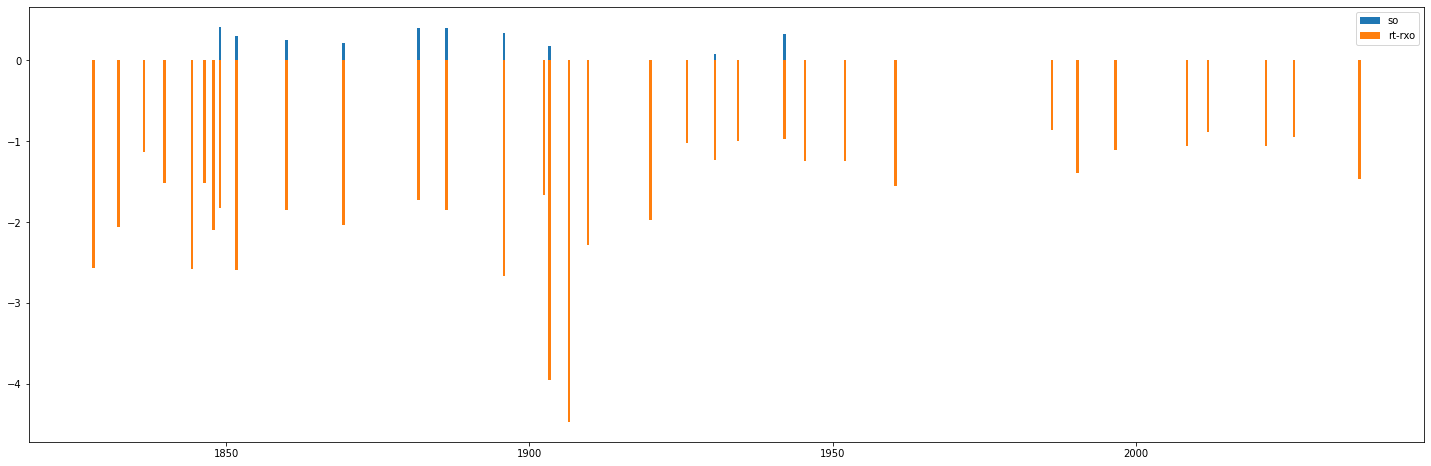

In [27]:

plotlist([dflayer[['砂层顶深','so']],dflayer[['砂层顶深','rt-rxo']]],figtype='bar')

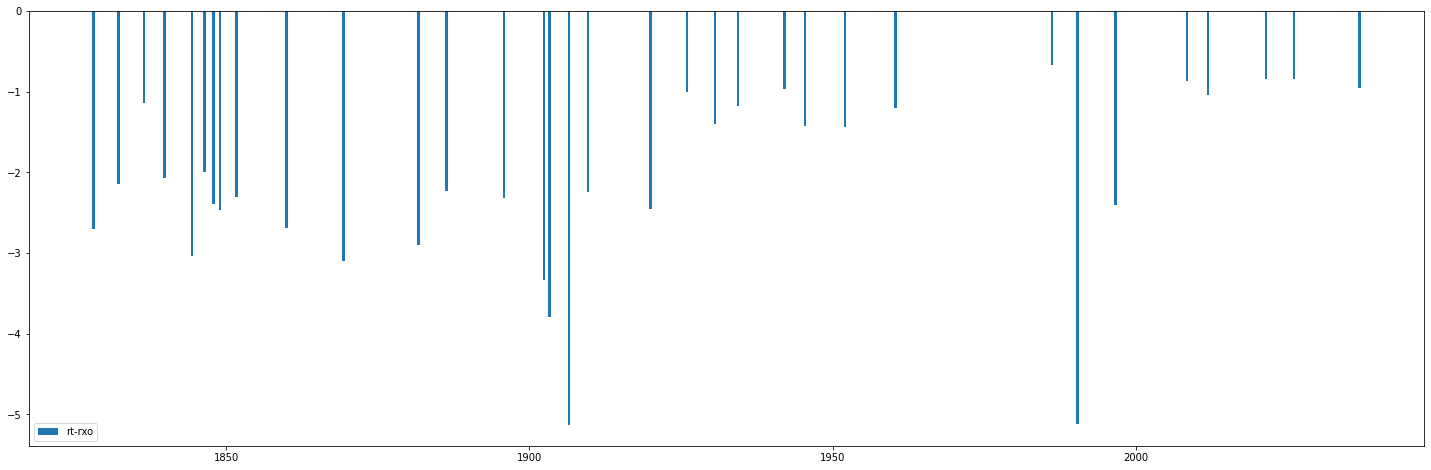

In [55]:
plotlist([dflayer[['砂层顶深','rt-rxo']]],figtype='bar')

In [8]:
curvedf.columns

Index(['DEPT', 'RMLL', 'R045', 'MNOR', 'CAL', 'GR', 'SP', 'AC', 'CNL', 'DEN',
       'R4', 'RLLD', 'RLLS', 'CALC', 'CL', 'FW', 'GRC', 'KRO', 'KRW', 'MD',
       'PER1', 'PERM', 'POR', 'POR1', 'PORF', 'PORN', 'PORO', 'PORT', 'PORW',
       'PP', 'RMFA', 'RWA', 'SH', 'SH1', 'SIRT', 'SOM', 'SOR', 'SW', 'SWC',
       'SWIR', 'SWRT', 'SXO', 'SXOC', 'XGR'],
      dtype='object')

In [7]:
curvedf.columns

Index(['DEPT', 'RMLL', 'R045', 'MNOR', 'CAL', 'GR', 'SP', 'AC', 'CNL', 'DEN',
       'R4', 'RLLD', 'RLLS', 'CALC', 'CL', 'FW', 'GRC', 'KRO', 'KRW', 'MD',
       'PER1', 'PERM', 'POR', 'POR1', 'PORF', 'PORN', 'PORO', 'PORT', 'PORW',
       'PP', 'RMFA', 'RWA', 'SH', 'SH1', 'SIRT', 'SOM', 'SOR', 'SW', 'SWC',
       'SWIR', 'SWRT', 'SXO', 'SXOC', 'XGR'],
      dtype='object')

In [8]:
curvedf

DEPT   RMLL   R045  MNOR     CAL       GR      SP       AC     CNL  \
0      1800.000  2.573  2.902   0.0  23.745   84.566  73.433  393.472  35.219   
1      1800.125  1.623  2.693   0.0  23.527   84.184  73.309  400.702  35.049   
2      1800.250  1.474  2.522   0.0  23.311   83.821  73.267  397.119  34.889   
3      1800.375  1.467  2.322   0.0  23.597   83.486  73.264  388.781  34.632   
4      1800.500  1.572  2.249   0.0  23.884   83.160  73.262  379.234  33.972   
...         ...    ...    ...   ...     ...      ...     ...      ...     ...   
11357  3219.625  5.511  3.893   0.0   7.297  135.854  54.372  265.959  19.762   
11358  3219.750  4.359  3.892   0.0   4.450  136.196  54.540  273.461  20.497   
11359  3219.875  3.325  3.892   0.0  20.288  135.401  54.399  278.735  21.156   
11360  3220.000  2.751  3.892   0.0  21.937  133.348  54.259  279.674  21.630   
11361  3220.125  2.751  3.892   0.0  21.937  133.348  54.259  279.674  21.630   

         DEN  ...  SIRT  SOM  SOR     SW    SWC   SWIR   SWRT    SXO   SXOC  \
0      2.230  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
1      2.229  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
2      2.224  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
3      2.215  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
4      2.207  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
...      ...  ...   ...  ...  ...    ...    ...    ...    ...    ...    ...   
11357  2.292  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
11358  2.287  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
11359  2.287  ...   0.0  0.0  0.1  100.0  180.0  100.0  100.0  100.0  180.0   
11360  2.283  ...   NaN  NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11361  2.283  ...   NaN  NaN  NaN    NaN    NaN    NaN    NaN    NaN    NaN   

           XGR  
0       83.909  
1       83.094  
2       82.309  
3       82.544  
4       82.789  
...        ...  
11357   90.879  
11358   85.098  
11359  123.665  
11360      NaN  
11361      NaN  

[11362 rows x 44 columns]

<AxesSubplot:xlabel='DEPTH'>

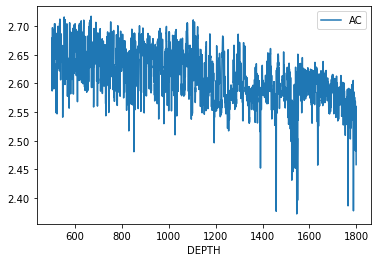

In [36]:
indata=curvedf[['DEPTH','AC']]
indata=indata.dropna(axis=0,how='any')
#indata=indata.loc[indata['SH']>90]
#indata=indata[['DEPT','AC']]
indata['AC']=indata["AC"].apply(np.log10)
indata=indata[(indata['DEPTH']>500)&(indata["DEPTH"]<1800)]
indata.plot('DEPTH','AC')

In [33]:
indata.columns

Index(['DEPTH', 'AC'], dtype='object')

In [37]:
n20=linearmodel(indata)

In [38]:
n20[1]

x         y
0   500.1  2.658587
1  1799.9  2.566392

No handles with labels found to put in legend.


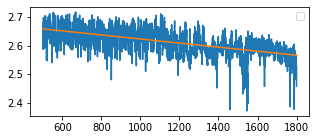

In [42]:
plotlist([indata,n20[1]],figsize=(5,2))

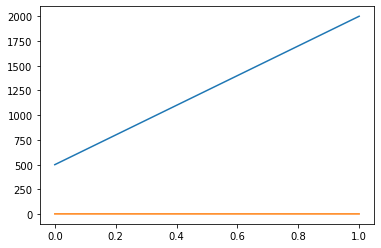

In [22]:
po.